In [1]:
pwd

'C:\\Users\\DELL\\Desktop\\emoji\\Flask\\model building'

In [2]:
!pip install keras
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import tensorflow

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
import os
filenames = os.listdir('C:/Users/DELL/Desktop/emoji/dataset/train_set')

In [14]:
train_ds = train_datagen.flow_from_directory('C:/Users/DELL/Desktop/emoji/dataset/train_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

test_ds = train_datagen.flow_from_directory('C:/Users/DELL/Desktop/emoji/dataset/test_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32,(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 20,
                    validation_data = test_ds,
                    validation_steps = len(test_ds))

Epoch 1/20
149/149 [==============================] - 46s 294ms/step - loss: 1.2834 - accuracy: 0.4070 - val_loss: 1.2977 - val_accuracy: 0.5051
Epoch 2/20
149/149 [==============================] - 23s 154ms/step - loss: 1.1177 - accuracy: 0.5256 - val_loss: 1.0927 - val_accuracy: 0.5253
Epoch 3/20
149/149 [==============================] - 23s 153ms/step - loss: 1.0120 - accuracy: 0.5849 - val_loss: 0.9978 - val_accuracy: 0.5505
Epoch 4/20
149/149 [==============================] - 23s 155ms/step - loss: 0.9135 - accuracy: 0.6213 - val_loss: 0.9136 - val_accuracy: 0.6111
Epoch 5/20
149/149 [==============================] - 24s 158ms/step - loss: 0.8382 - accuracy: 0.6482 - val_loss: 0.8087 - val_accuracy: 0.6313
Epoch 6/20
149/149 [==============================] - 23s 157ms/step - loss: 0.7421 - accuracy: 0.6914 - val_loss: 0.7784 - val_accuracy: 0.6616
Epoch 7/20
149/149 [==============================] - 24s 159ms/step - loss: 0.7211 - accuracy: 0.7089 - val_loss: 0.7693 - val_ac

In [20]:
model.save('model.h5')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
!tar -zcvf model.tgz model.h5

a model.h5


In [22]:
ls -la

 Volume in drive C is OS
 Volume Serial Number is B259-6040

 Directory of C:\Users\DELL\Desktop\emoji\Flask\model building



File Not Found


In [23]:
result = model.evaluate(test_ds)

40/40 [==============================] - 4s 100ms/step - loss: 0.5257 - accuracy: 0.8131


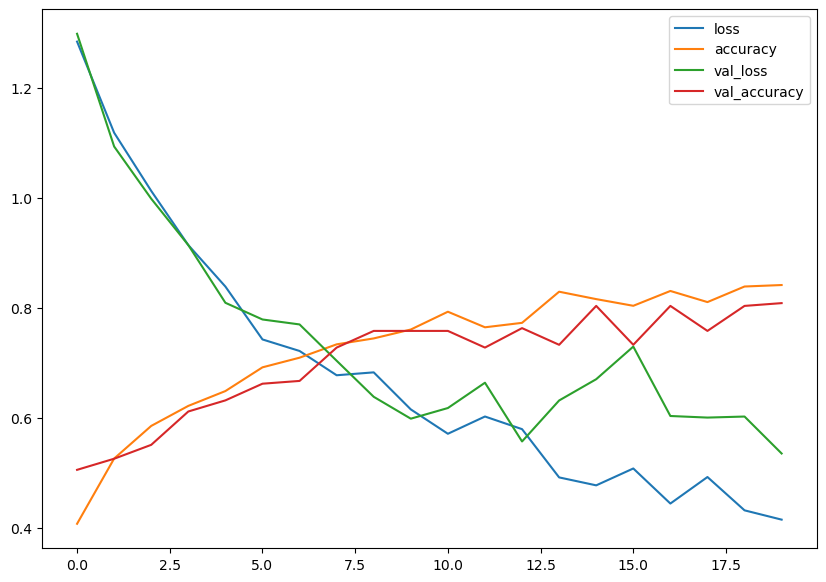

In [24]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [26]:
!pip install watson-machine-learning-client --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [35]:
!pip install -U ibm-watson-machine-learning

Defaulting to user installation because normal site-packages is not writeable


In [39]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : " "
}
client = APIClient(wml_credentials)

Error getting IAM Token.
Reason: <Response [400]>


WMLClientError: Error getting IAM Token.
Reason: <Response [400]>

In [40]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [41]:
space_uid = guid_from_space_name(client, 'Natural Disasters Intensity Analysis And Classification')
print('space uid: ' + space_uid)

NameError: name 'client' is not defined